# Special data preprocessing operations for machine learning - Intro

This chapter combines (a very short) intro to machine learning with a climpse at special data preprocessing steps required in that context.

# Demo Use Case: Wine Quality Dataset

## Preparations

In [1]:
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", 500)

## Load the data

In [2]:
df = pd.read_csv("../../data/raw/winequality.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## (Basic) data understanding

In [3]:
# the dataset starts with the red wines
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
# white wines are at the end
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [5]:
# describe the numeric columns of the resulting DataFrame
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


<Axes: xlabel='type', ylabel='count'>

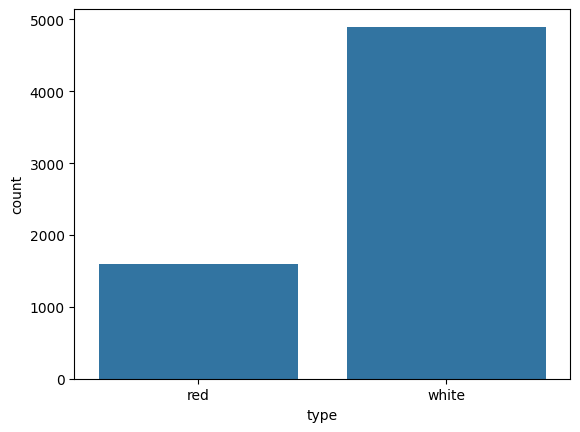

In [6]:
# Also plot a barchart of the "type" of wine
sns.countplot(x="type", data=df)

# scikit-learn overview

We use the scikit-learn package for most of the Machine Learning legwork. The package contains many useful objects and functions that support, i.a.:

* Supervised Classification
* Supervised Regression
* Unsupervised Clustering
* Unsupervised Dimensionality Reduction
* Model evaluation
* Model selection
* Preprocessing
* Visualizations

Somewhat confusingly for beginners: even though the official name is `scikit-learn`, the package to imported to Python is called `sklearn`.

The `sklearn` package contains many individual modules. Here are some popular examples grouped by **preprocessing**, **algorithms**, **model evaluation and selection**, and **model inspection**:
 * **preprocessing**:
   * `sklearn.preprocessing`:
      * `MaxAbsScaler` (-1..1)
      * `MinMaxScaler` (0..1)
      * `StandardScaler`
      * `OneHotEncoder`
   * `sklearn.impute`:
      * `SimpleImputer`
      * `IterativeImputer`
      * `KNNImputer`
   * `sklearn.compose`: `ColumnsTransformer`
   * `sklearn.pipelines`: `Pipeline`
 * **algorithms**:
   * `sklearn.tree` - basic decision tree algorithms:
      * `DecisionTreeClassifier`
      * `DecisionTreeRegressor`
   * `sklearn.linear_model`:
      * `LogisticRegression`
      * `LinearRegression`
      * `ElasticNet`
   * `sklearn.ensemble`:
      * `BaggingClassifier`
      * `BaggingRegressor`
      * `GradientBoostingClassifier`
      * `GradientBoostingRegressor`
      * `RandomForestClassifier`
      * `RandomForestRegressor`
      * `StackingClassifier`
      * `StackingRegressor`
      * `VotingClassifier`
      * `VotingRegressor`
   * `sklearn.neighbor`:
      * `KNeighborsClassifier`
      * `KNeighborsRegressor`
   * `sklearn.svm` - Support Vector Machines:
      * `SVC`
      * `SVR`
   * `sklearn.cluster`:
      * `DBSCAN`
      * `KMeans`
   * `sklearn.decomposition` - algorithms for dimensionality reduction:
      * `PCA`
      * `KernelPCA`
      * `LatentDirichletAllocation` ("Topic Model")
   * `sklearn.manifold.TSNE` - another popular algorithm for dimensionality reduction
 * **model evaluation and selection**:
   * `sklearn.metrics` - evaluation metrics
      * for classification:
         * `accuracy_score`
         * `precision_score`
         * `recall_score`
         * `f1_score`
         * `roc_auc_score`
         * `classification_report`
      * for regression:
         * `r2_score`
         * `mean_squared_error`
         * `max_error`
   * `sklearn.model_selection`: - tools for (cross-)validation and model selection
      * `train_test_split`
      * `KFold`
      * `StratifiedKFold`
      * `cross_validate`
      * `GridSearchCV`
      * `RandomizedSearchCV`
   * `sklearn.feature_selection`:
      * `SelectFromModel`
      * `SequentialFeatureSelector`
      * `RFE`
 * **model inspection**: `sklearn.inspection`
   * `partial_dependence`
   * `permutation_importance`
   * `PartialDependenceDisplay`

# A (very simple) machine learning workflow without further data preprocessing

## decision tree with two features without test set

Let's start with a simple decision tree. We fit the model on the whole dataset and then predict the "type" of wine in the same dataset.

For our first model, we use only two features: "alcohol" and "volatile acidity"

In [7]:
# prepare the dataset for usage with sklearn
feature_names = ["alcohol", "volatile acidity"]
X = df[feature_names]

X.head()

,alcohol,volatile acidity
0,9.4,0.70
1,9.8,0.88
2,9.8,0.76
3,9.8,0.28
4,9.4,0.70


In [8]:
df["type"].value_counts(dropna=False)

type
white    4898
red      1599
Name: count, dtype: int64

In [9]:
# many functions in sklearn are easier to use if our binary class problem encodes the target as 0/1 instead of "red"/"white"!
# What could go wrong with the following statement?
y = (df["type"] == "white").astype("int")
print("Examples of y:")
print(y.head())
print(y.tail())

Examples of y:
0    0
1    0
2    0
3    0
4    0
Name: type, dtype: int64
6492    1
6493    1
6494    1
6495    1
6496    1
Name: type, dtype: int64


In [10]:
# import required modules
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

# create an instance of the DecisionTreeClassifier specifying two hyperparameters
# => https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
model = DecisionTreeClassifier(max_depth=1000, min_samples_leaf=1, random_state=123)

# fit the model using the whole dataset
model.fit(X=X, y=y)

# predict the target ("type"), also for the whole dataset
y_pred = model.predict(X=X)

print(f"{'Accuracy':<17}: {accuracy_score(y_true=y, y_pred=y_pred):5.2f}")
print(f"{'precision_score':<17}: {precision_score(y_true=y, y_pred=y_pred):5.2f}")
print(f"{'recall_score':<17}: {recall_score(y_true=y, y_pred=y_pred):5.2f}")

Accuracy         :  0.93
precision_score  :  0.95
recall_score     :  0.96


In [11]:
# there is also a "full" classification_report in sklearn.metrics
from sklearn.metrics import classification_report

print(classification_report(y_true=y, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1599
           1       0.95      0.96      0.95      4898

    accuracy                           0.93      6497
   macro avg       0.90      0.90      0.90      6497
weighted avg       0.93      0.93      0.93      6497



## use a simple train/test split for validation

In [12]:
# the function train_test_split performs the simple split
from sklearn.model_selection import train_test_split

# define X and y
feature_names = ["alcohol", "volatile acidity"]
X = df[feature_names]
y = (df["type"] == "white").astype("int")

# we use 20% as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print("X_train.shape:")
print(X_train.shape)
print("X_test.shape:")
print(X_test.shape)
print("y_train.shape:")
print(y_train.shape)
print("y_test.shape:")
print(y_test.shape)

X_train.shape:
(5197, 2)
X_test.shape:
(1300, 2)
y_train.shape:
(5197,)
y_test.shape:
(1300,)


In [13]:
# now we proceed with very similar code, compared to above
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

# create an instance of the DecisionTreeClassifier specifying two hyperparameters
# => https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
model = DecisionTreeClassifier(max_depth=1000, min_samples_leaf=1)

# fit the model using the TRAINING dataset
model.fit(X=X_train, y=y_train)

# predict the target ("type"), for both the TRAINING and the TEST dataset
y_train_pred = model.predict(X=X_train)
y_test_pred = model.predict(X=X_test)

# print some evaluation metrics
print("Scores in the training-set:")
print(f"{'accuracy_score':<17}: {accuracy_score(y_true=y_train, y_pred=y_train_pred):5.2f}")
print(f"{'precision_score':<17}: {precision_score(y_true=y_train, y_pred=y_train_pred):5.2f}")
print(f"{'recall_score':<17}: {recall_score(y_true=y_train, y_pred=y_train_pred):5.2f}")
print("Scores in the test-set:")
print(f"{'accuracy_score':<17}: {accuracy_score(y_true=y_test, y_pred=y_test_pred):5.2f}")
print(f"{'precision_score':<17}: {precision_score(y_true=y_test, y_pred=y_test_pred):5.2f}")
print(f"{'recall_score':<17}: {recall_score(y_true=y_test, y_pred=y_test_pred):5.2f}")

Scores in the training-set:
accuracy_score   :  0.93
precision_score  :  0.95
recall_score     :  0.96
Scores in the test-set:
accuracy_score   :  0.84
precision_score  :  0.89
recall_score     :  0.89


# Exercise - Bank Marketing Dataset

**Your task:**
1.  Load the Dataset "bank-additional-full.csv"
2.  Understand the data
3.  Define your X and y for use with the scikit-learn package. For now, include only numeric features: 'age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'.
4.  Fit and evaluate a decision tree model for classification using a simple train/test split
5.  BONUS: Cross-validate a logistic regression model for the same classification task (see: [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

# Overview of data preprocessing steps

Many machine learning tasks require data preprocessing steps to be performed before models can be fit or before using a trained model for predictions.

The module `sklearn.preprocessing` contains several useful classes for such operations, for example:
* `preprocessing.OneHotEncoder`: Encode categorical features as a one-hot numeric array.
* `preprocessing.StandardScaler`: Standardize features by removing the mean and scaling to unit variance.
* `preprocessing.MaxAbsScaler`: Scale each feature by its maximum absolute value (scales to a range from -1 to 1).
* `preprocessing.MinMaxScaler`: Transform features by scaling each feature to a given range (e.g. from 0 to 1).
* `preprocessing.RobustScaler`: Scale features using statistics that are robust to outliers (i.e. median instead of mean, IQR instead of standard deviation)
* `preprocessing.PowerTransformer`: Apply a power transform featurewise to make data more Gaussian-like, supports 'yeo-johnson' and 'box-cox' transformations.

There are also other modules that contain data preprocessing steps, such as `sklearn.impute` for missing-value imputation:
* `impute.SimpleImputer`
* `impute.IterativeImputer`
* `impute.KNNImputer`

These operations have in common that they require information about more than one observation in the dataset, for instance the mean, standard deviation, or the individual categories of a categorical variable. To prevent **information-leak** when evaluating machine learning models, such statistics must be collected using the training data only. When predictions on "unseen" test data are made, the previously collected statistics are used to perform the necessary preprocessing steps for the test data.

**Here are a few questions to discuss:**
* Considering **one-hot-encoding**: What happens (or should happen) if "new" categories come up in the test set, compared to the training set?
* Considering different alternatives for **scaling**: What happens (or should happen) if the test data falls out of the training data's range of values?
* **Always ask yourself**: how would a preprocessing step be performed for prediction if only one observation is available at the time?

# Scaling

There are many machine learning algorithms that are sensitive to the scale of the data, for example:
* Nearest-Neighbor algorithms for classification or regression such as `KNN` (e.g. `neighbors.KNeighborsClassifier`, `neighbors.KNeighborsRegressor`)
* Most clustering algorithms, such as `cluster.DBSCAN`, `cluster.KMeans`
* Support vector machines (`svm.SVC`, `svm.SVR`)
* Neural networks / deep learning algorithms (can be found in `sklearn.neural_network` but typically done with `keras`, `tensorflow`, `torch`)

Let's demonstrate using the wine classification example!

In [14]:
# import modules
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# loading the prepared wine dataframe from our pickle file
df = pd.read_csv("../../data/raw/winequality.csv")

# get X and y
feature_names = ["volatile acidity", "density", "residual sugar"]
X = df[feature_names]
y = (df["type"] == "white").astype("int")

# we use 50% as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

# create an instance of the StandardScaler
scaler = StandardScaler().set_output(transform="pandas")

# create two alternative instances of the KNeighborsClassifier
model_unscaled = KNeighborsClassifier(n_neighbors=2)
model_scaled = KNeighborsClassifier(n_neighbors=2)

# fit the models
model_unscaled.fit(X=X_train, y=y_train)

# the scaled version also needs to fit the scaler-object
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
volatile acidity,3248.0,2.537653e-16,1.000154,-1.560345,-0.653667,-0.290995,0.373903,7.506441
density,3248.0,1.579908e-14,1.000154,-2.551121,-0.800222,0.060105,0.765841,5.235507
residual sugar,3248.0,-2.756416e-16,1.000154,-1.030952,-0.778479,-0.504966,0.570675,5.491275


In [15]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
volatile acidity,3248.0,0.338142,0.165464,0.08000,0.23000,0.2900,0.4000,1.5800
density,3248.0,0.994721,0.002976,0.98713,0.99234,0.9949,0.9970,1.0103
residual sugar,3248.0,5.500092,4.753710,0.60000,1.80000,3.1000,8.2125,31.6000


In [16]:
model_scaled.fit(X=X_train_scaled, y=y_train)

# make predictions
y_test_pred_unscaled = model_unscaled.predict(X=X_test)
# for the scaled version we need a scaled X_test:
X_test_scaled = scaler.transform(X_test)
X_test_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
volatile acidity,3249.0,0.018422,0.990189,-1.560345,-0.653667,-0.290995,0.434348,4.695737
density,3249.0,-0.016477,1.015373,-2.557842,-0.800222,0.026498,0.745678,14.873853
residual sugar,3249.0,-0.023921,1.001887,-1.030952,-0.778479,-0.547045,0.525967,12.686764


In [17]:
y_test_pred_scaled = model_scaled.predict(X=X_test_scaled)

# compare accuracy
print(
    f"{'Accuracy of unscaled model: ':<30}: {accuracy_score(y_true=y_test, y_pred=y_test_pred_unscaled):5.2f}"
)
print(
    f"{'Accuracy of scaled model: ':<30}: {accuracy_score(y_true=y_test, y_pred=y_test_pred_scaled):5.2f}"
)

Accuracy of unscaled model:   :  0.89
Accuracy of scaled model:     :  0.95


# Transforming categorical features for scikit-learn

## Overview of tranformations for categorical features
Scikit-learn, like most machine learning tools, cannot directly pass non-numeric features to its algorithms. Categorical features typically come as strings and are therefore not suited - and even if they come in numeric form (such as IDs), it would not be wise (in most cases) to simply pass them on to the algorithm!

There are a number of ways to transform categorical features so that they can be used with machine learning algorithms, most notably
* **One-hot encoding**: convert one categorical column to multiple binary (0 or 1) columns as many as the number of distinct categories in the original column.
* **Target encoding**: generate a (set of) new column(s) that summarize the target column by category (e.g. the category-specific proportion of the positive class, or,  in case of regression tasks, the category mean)
* **Frequency encoding**: generate a new column representing the (absolute or relative) frequencies of the individual categories.
* **Label encoding**: each category is assigned a number. Not appropriate if algorithm assumes an order in this numbering scheme!
* **Categorical embedding**: use a neural network to reduce the dimensionality of categorical features. (packages: `categorical_embedder`, `keras`)

See here, for a good overview and even more methods:

[https://towardsdatascience.com/catalog-of-variable-transformations-to-make-your-model-works-better-7b506bf80b97](https://towardsdatascience.com/catalog-of-variable-transformations-to-make-your-model-works-better-7b506bf80b97)

We are going to create an additional, categorical, column in the wine dataset, one-hot encode it, and use it for our classification

## Generating a new categorical column for our tests with the wine data

We pretend there is a categorical feature where the experts qualitatively describe the wines aspects
Fortunately, the experts all used the same strings and only chose three different descriptions...:
* *"sweet_and_lots_of_sulfur"*
* *"acidic_and_some_sugar*
* *"indescribable"*

<Axes: xlabel='description', ylabel='count'>

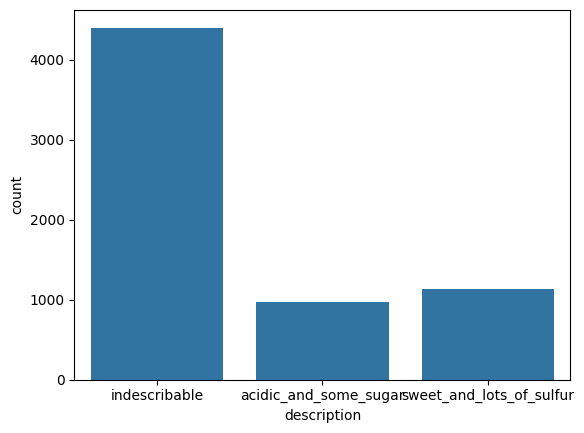

In [18]:
import seaborn as sns


def describe_wine(x):
    if x["residual sugar"] > 10 and x["total sulfur dioxide"] > 100:
        return "sweet_and_lots_of_sulfur"
    if x["residual sugar"] > 2 and x["volatile acidity"] > 0.40:
        return "acidic_and_some_sugar"
    return "indescribable"


df["description"] = df.apply(describe_wine, axis=1)

sns.countplot(x="description", data=df)

In [19]:
df.groupby(["type", "description"]).size()

type   description             
red    acidic_and_some_sugar        719
       indescribable                878
       sweet_and_lots_of_sulfur       2
white  acidic_and_some_sugar        247
       indescribable               3523
       sweet_and_lots_of_sulfur    1128
dtype: int64

In [20]:
import numpy as np

# show some examples of each category
example_indices = df.loc[df["description"] == "acidic_and_some_sugar", :].index[0:3].to_numpy()
example_indices = np.concatenate(
    (example_indices, df.loc[df["description"] == "indescribable", :].index[0:3].to_numpy())
)
example_indices = np.concatenate(
    (
        example_indices,
        df.loc[df["description"] == "sweet_and_lots_of_sulfur", :].index[0:3].to_numpy(),
    )
)
df.loc[example_indices, :]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,description
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,acidic_and_some_sugar
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,acidic_and_some_sugar
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,red,acidic_and_some_sugar
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,indescribable
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,indescribable
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,indescribable
1235,6.0,0.33,0.32,12.9,0.054,6.0,113.0,0.99572,3.30,0.56,11.5,4,red,sweet_and_lots_of_sulfur
1244,5.9,0.29,0.25,13.4,0.067,72.0,160.0,0.99721,3.33,0.54,10.3,6,red,sweet_and_lots_of_sulfur
1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white,sweet_and_lots_of_sulfur


## Demonstration of one-hot-encoding outside of a modeling process

To see how one-hot-encoding works, let's first use it without a model.

In [21]:
# import the required module
from sklearn.preprocessing import OneHotEncoder

# instantiate a OneHotEncoder object
onehot = OneHotEncoder(sparse_output=False).set_output(transform="pandas")

# train/fit the encoder using the categorical column
# note that fit() expects a 2D array so we need to use double brackets [[]]
onehot.fit(df[["description"]])

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [22]:
# now produce one-hot-encoded columns, one for each category in the categorical column
onehot_df = onehot.transform(df[["description"]])
onehot_df.loc[example_indices, :]

,description_acidic_and_some_sugar,description_indescribable,description_sweet_and_lots_of_sulfur
1,1.0,0.0,0.0
2,1.0,0.0,0.0
9,1.0,0.0,0.0
0,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
1235,0.0,0.0,1.0
1244,0.0,0.0,1.0
1599,0.0,0.0,1.0


In [23]:
# the trained OneHotEncoder-object contains the names of the generated features
print(onehot.get_feature_names_out())

['description_acidic_and_some_sugar' 'description_indescribable'
 'description_sweet_and_lots_of_sulfur']


In [24]:
# Finally, combine the generated dataframe with (part of) the old dataframe for demonstration:
onehot_df_demo = onehot_df.join(df[["description"]])
onehot_df_demo.loc[example_indices, :]

,description_acidic_and_some_sugar,description_indescribable,description_sweet_and_lots_of_sulfur,description
1,1.0,0.0,0.0,acidic_and_some_sugar
2,1.0,0.0,0.0,acidic_and_some_sugar
9,1.0,0.0,0.0,acidic_and_some_sugar
0,0.0,1.0,0.0,indescribable
3,0.0,1.0,0.0,indescribable
4,0.0,1.0,0.0,indescribable
1235,0.0,0.0,1.0,sweet_and_lots_of_sulfur
1244,0.0,0.0,1.0,sweet_and_lots_of_sulfur
1599,0.0,0.0,1.0,sweet_and_lots_of_sulfur


# Using the OneHotEncoder and a Scaler a preprocessing for a model

In [25]:
# import modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# get X and y
numeric_features = ["volatile acidity", "residual sugar"]
print(f"Numeric features: {numeric_features}")
categorical_features = ["description"]
print(f"Categorical features: {categorical_features}")
X = df[numeric_features + categorical_features]
y = (df["type"] == "white").astype("int")
X.loc[example_indices, :]

Numeric features: ['volatile acidity', 'residual sugar']
Categorical features: ['description']


,volatile acidity,residual sugar,description
1,0.88,2.6,acidic_and_some_sugar
2,0.76,2.3,acidic_and_some_sugar
9,0.50,6.1,acidic_and_some_sugar
0,0.70,1.9,indescribable
3,0.28,1.9,indescribable
4,0.70,1.9,indescribable
1235,0.33,12.9,sweet_and_lots_of_sulfur
1244,0.29,13.4,sweet_and_lots_of_sulfur
1599,0.27,20.7,sweet_and_lots_of_sulfur


In [26]:
# we use 50% as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

# create an instance of the OneHotEncoder
# in logistic regression we want a baseline-category, so we drop the first one-hot-column
onehot = OneHotEncoder(drop="first", sparse_output=False).set_output(transform="pandas")

# create an instance of the StandardScaler
scaler = StandardScaler().set_output(transform="pandas")

# fit and then use the transformers before the model
onehot.fit(X_train[categorical_features])
X_train_onehot = onehot.transform(X_train[categorical_features])
X_train_onehot.head(3)

,description_indescribable,description_sweet_and_lots_of_sulfur
2653,1.0,0.0
1376,1.0,0.0
2693,1.0,0.0


In [27]:
scaler.fit(X_train[numeric_features])
X_train_scaled = scaler.transform(X_train[numeric_features])
X_train_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
volatile acidity,3248.0,2.537653e-16,1.000154,-1.560345,-0.653667,-0.290995,0.373903,7.506441
residual sugar,3248.0,-2.756416e-16,1.000154,-1.030952,-0.778479,-0.504966,0.570675,5.491275


In [28]:
# combine the two prepared DataFrames
X_train_prepped = pd.concat([X_train_onehot, X_train_scaled], axis=1)

# show the first few rows:
X_train_prepped.head(5)

,description_indescribable,description_sweet_and_lots_of_sulfur,volatile acidity,residual sugar
2653,1.0,0.0,-0.170105,-0.799518
1376,1.0,0.0,3.305497,-0.862637
2693,1.0,0.0,-0.593221,0.610124
6269,0.0,1.0,-0.321218,1.241308
3319,1.0,0.0,-0.835002,-0.610163


In [29]:
# define the model
model = LogisticRegression()

# now fit the model
model.fit(X=X_train_prepped, y=y_train)

# making predictions requires the same transformations as before
X_test_onehot = onehot.transform(X_test[categorical_features])
X_test_scaled = scaler.transform(X_test[numeric_features])
X_test_prepped = pd.concat([X_test_onehot, X_test_scaled], axis=1)

# finally use the prepped test-set for predictions
y_test_pred = model.predict(X=X_test_prepped)

# Report accuracy
print("\033[94mModel Performance:\033[0m")
print(f"{'Accuracy:':<40}: {accuracy_score(y_true=y_test, y_pred=y_test_pred):5.2f}")
print(f"{'precision_score':<40}: {precision_score(y_true=y_test, y_pred=y_test_pred):5.2f}")
print(f"{'recall_score':<40}: {recall_score(y_true=y_test, y_pred=y_test_pred):5.2f}")

# print model coefficients
print("\033[94mModel coefficients:\033[0m")
print(f"{'Intercept:':<40}: {model.intercept_[0]:5.2f}")
for i, coef in enumerate(model.coef_[0, :]):
    print(f"{X_test_prepped.columns[i]:<40}: {coef:5.2f}")

Model Performance:
Accuracy:                               :  0.89
precision_score                         :  0.91
recall_score                            :  0.95
Model coefficients:
Intercept:                              :  1.93
description_indescribable               :  0.51
description_sweet_and_lots_of_sulfur    :  1.10
volatile acidity                        : -2.06
residual sugar                          :  2.07


# Exercise - Bank Marketing Dataset - Continued

We use the Bank Marketing Dataset from UCI:

[https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#)

"The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y)."

**Your tasks:**
1.  *Load the Dataset "bank-additional-full.csv"*
2.  *Understand the data*
3.  *Define your X and y for use with the scikit-learn package. For now, include only numeric features: 'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'.*
4.  *Fit and evaluate a decision tree model for classification using a simple train/test split*
5.  *BONUS: Cross-validate a logistic regression model for the same classification task (see: [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))*
6.  Using a train/test split, fit and evaluate a KNN-Classifier. Make sure to scale numeric features and to use one-hot-encoding for categorical features.
7.  BONUS: Cross-validate a machine learning pipeline that includes one-hot-encoded categorical features and scaled numeric features